# Binary Classification - League of Legends Season 13 tournament Dataset

In this notebook we are attempting to see if the K-Nearest Neighbor (K-NN) predictor model still gives about 50% prediction accuracy with the current state of the Riot Games multiplayer online battle arena game, League of Legends.

## Dataset
We will be using the Game_Info.csv file that was compiled by our group. The dataset was compiled by using professional players that had attended and/or competed in the Worlds 2020 Tournament in Shanghai, China in October of 2020. 

The game information that was gathered were tournament games played by the players. The data that was gathered were:

    - The match ID number
    - The region where it was played
    - The season in which the match was played
    - The winning team of the match
    - The champions that were played and the spells used by that champion
    
The total number of matches that we were able to compile was total of 2825 from various regions. The China region was excluded in this collection of data due to the inability to access that information from any other server in the world.

The target label for this dataset is 'Winner' because we were attempting to predict the winner of a match based on a team's champion selection.
    
    Blue Team Winner (C1-C5): 0
    Red Team Winner (C6-C10): 1

## Goals
We will use Scikit-Learn's K-NN classifier to predict the winner of a match.

In [12]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report

## Load the Data

First load the data

In [13]:
matches = pd.read_csv('Game_Info.csv', sep=",")

In [14]:
matches.head()

,gameID,platformID,seasonID,Winner,C1,C1S1,C1S2,C2,C2S1,C2S2,...,C7S2,C8,C8S1,C7S2.1,C9,C9S1,C9S2,C10,C10S1,C10S2
0,3591397591,NA1,13,1,201,4,14,102,12,4,...,7,4,14,4,876,14,4,120,11,4
1,3653371287,NA1,13,0,120,11,6,13,12,4,...,4,11,11,4,55,14,4,86,14,4
2,3650198359,NA1,13,1,102,11,4,122,4,6,...,4,99,21,4,202,7,4,63,4,14
3,3645932094,NA1,13,0,18,4,7,99,3,4,...,4,254,11,4,777,4,14,150,4,12
4,3645761570,NA1,13,0,102,11,4,82,4,12,...,4,64,11,4,105,14,4,21,14,4


In [15]:
matches.shape

(2825, 34)

In [16]:
#shuffling the data
matches.sample(frac=1)

,gameID,platformID,seasonID,Winner,C1,C1S1,C1S2,C2,C2S1,C2S2,...,C7S2,C8,C8S1,C7S2.1,C9,C9S1,C9S2,C10,C10S1,C10S2
495,3103740888,NA1,13,1,82,12,4,90,12,4,...,14,68,4,12,74,4,12,141,4,11
1674,324755293,OC1,13,0,429,4,7,41,4,12,...,4,516,4,12,64,11,4,145,4,7
2227,2449405250,EUN1,13,1,164,4,12,64,11,4,...,7,107,4,11,145,4,1,238,14,4
749,3371516077,NA1,13,1,266,4,12,21,7,4,...,4,157,4,3,420,12,4,76,11,4
1048,4808740096,KR,13,1,6,4,12,67,7,4,...,4,59,11,4,55,14,12,106,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,276263846,OC1,13,1,89,3,4,222,4,7,...,14,1,4,14,28,4,11,17,4,14
959,1099014390,'TR1',13,1,11,4,11,236,4,7,...,4,350,3,14,164,12,14,22,4,7
646,3360648844,NA1,13,0,875,12,4,117,4,3,...,14,99,4,3,145,7,4,154,11,4
2353,2492794931,EUN1,13,1,98,4,12,62,4,11,...,4,202,4,7,25,4,14,85,12,4


## Create the Data Matrix

Our goal is to predict the winner of a match.

So we are using the champions as the means to predict the winner.

In [17]:
#Data Matrix
X = pd.DataFrame(matches, columns=["C1","C2","C3",
          "C4","C5","C6",
          "C7","C8","C9",
          "C10"])

#Target Vector
y=matches['Winner']

print(X.shape)
print(y.shape)

(2825, 10)
(2825,)


## Create Train and Test Dataset

We use sklearn's train_test_split function to spilt the information in the csv file.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(y_train.shape)

(2260,)


## K Neighbors Classifier Parameters

Since we do not know what would be the best parameters to predict the outcome of match, I thought it best to just try as many and see which ones worked. The paper that we used as our base line also did not specify what the parameters that they used.

In [19]:
# Set the the range of K 
neighbors = np.arange(1,60)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
validation_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute training accuracy 
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute validation accuracy using cross-validation
    
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
    
    validation_accuracy[i] = scores.mean()

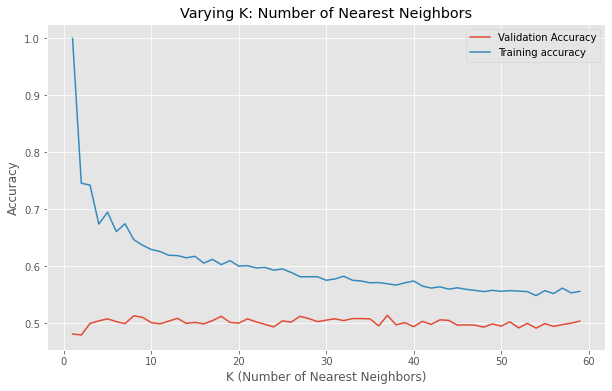

Optimal K:  37


In [20]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, validation_accuracy, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()



# Find the value of "K" that gives max validation accuracy
j = 0
max_val_accuracy = validation_accuracy[j]
max_k = 1

for i in neighbors:
    if(validation_accuracy[j] > max_val_accuracy):
        max_val_accuracy = validation_accuracy[j]
        max_k = i
    j +=1
    
print("Optimal K: ", max_k)

## Model Selection: Choose a Combination of Optimal Parameters

Again, since the base paper didn't provide the information for this portion, I thought to ust try them all. Also considering that the state of the League of Legends game could change with one patch update, I thought to include multiple options just in case.

In [21]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 686 candidates, totalling 3430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2176 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2804 tasks      | elapsed:  4.7min


Best Score: 0.680292
Optimal Hyperparameter Values:  {'n_neighbors': 1, 'p': 500, 'weights': 'uniform'}


CPU times: user 6.33 s, sys: 614 ms, total: 6.94 s
Wall time: 5min 37s


[Parallel(n_jobs=-1)]: Done 3430 out of 3430 | elapsed:  5.6min finished


## Select the Best Model

Now that we have the best parameters for the currect dataset, we will try to train the classifier with those parameters to get the best prediction possible.

##  Evaluate Model Performance Using Cross-Validation

In [22]:
knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)
print(y_train_predicted)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)

[1 1 1 ... 1 0 0]

Training Accuracy:  1.0


In [23]:
# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
print(scores)

print("F1 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.68029197 0.68029197 0.68029197 0.68029197 0.68029197]
F1 Score: 0.68 (+/- 0.00)


## Evaluate The Model Using Confusion Matrix for Training Data

In [24]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[   0, 1095],
       [   0, 1165]])

## Precision, Recall & F1 Score for Training Data

In [25]:
precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

Precision = 0.515487
Recall = 1.000000
F1 Score = 0.680292


In [26]:
#The accuracy of the model
train_accuracy_knn = knn.score(X_train, y_train)
print("\nTest Accuracy: ", train_accuracy_knn)


# No. of Correct Predictions
y_train_predicted = knn.predict(X_train)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_train_predicted == y_train), len(y_train)))

# Confusion Matrix
print("\nConfusion Matrix (Train Data):\n", confusion_matrix(y_train, y_train_predicted))

precision = precision_score(y_train, y_train_predicted) 
print("Train Precision = %f" % precision)

recall = recall_score(y_train, y_train_predicted)
print("Train Recall = %f" % recall)


f1 = f1_score(y_train, y_train_predicted)
print("Train F1 Score = %f" % f1)
print(classification_report(y_train,y_train_predicted))


Test Accuracy:  1.0

No. of correct predictions (Test): 2260/2260

Confusion Matrix (Train Data):
 [[1095    0]
 [   0 1165]]
Train Precision = 1.000000
Train Recall = 1.000000
Train F1 Score = 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00      1165

    accuracy                           1.00      2260
   macro avg       1.00      1.00      1.00      2260
weighted avg       1.00      1.00      1.00      2260



## Evaluate the Model using the ROC Curve for Training Data

In [27]:
# Get the 2nd column of the matrix of predicted probabilities  for each data point
#    The 2nd column stores the probabilities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:, 1]


fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0. 1.]
TPR:  [0. 1.]

Thresholds:  [2. 1.]


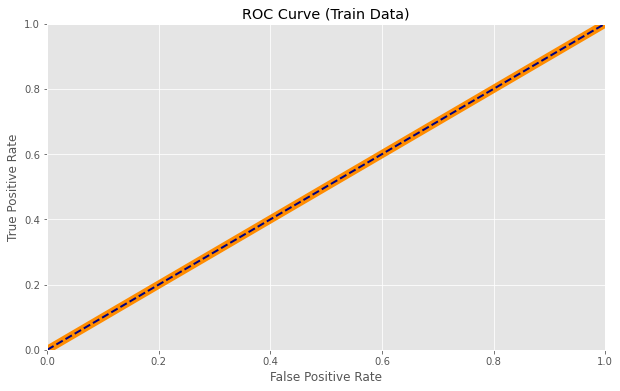

In [28]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

## Area Under the ROC Curve

In [29]:
#Area under ROC curve
roc_auc_score(y_train,y_scores)

0.5

## Precision-Recall Curve

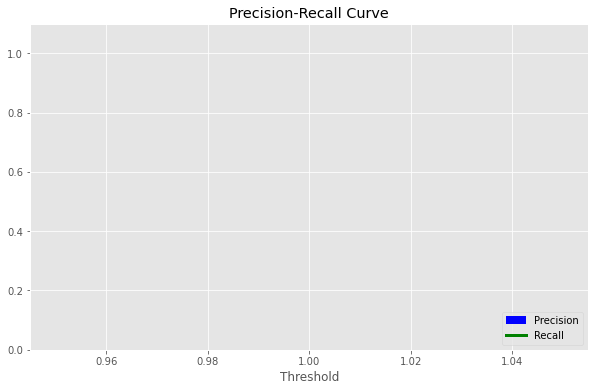

Optimal Threshold:  -1


In [30]:
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


threshold_optimal = -1
for i in range(len(precisions)):
    if(precisions[i] == recalls[i]):
        threshold_optimal = thresholds[i]

print("Optimal Threshold: ", threshold_optimal)

## Performance Measures for Varying Threshold

In [31]:
print("Performance Measures Based on the Default Threshold:\n")


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_train = precision_score(y_train, y_train_pred) 
print("Precision (Default Threshold 0.5) = %f" % precision_train)

recall_train = recall_score(y_train, y_train_pred)
print("Recall (Default Threshold 0.5) = %f" % recall_train)


f1_train = f1_score(y_train, y_train_pred)
print("F1 Score (Default Threshold 0.5) = %f" % f1_train)

print("Confusion Matrix (Default Threshold 0.5)\n", confusion_matrix(y_train, y_train_pred))


print("\n-------------------------------------------------------\n")
print("Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):")

# Precision, Recall, F1 Score and Confusion Matrix for different threshold

t = threshold_optimal # optimal threshold from precision-recall curve 

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted_new = (cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:,1] > t).astype(int)


precision = precision_score(y_train, y_train_predicted_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision))

recall = recall_score(y_train, y_train_predicted_new)
print("Recall (Threshold %.2f) = %f" % (t, recall))


f1 = f1_score(y_train, y_train_predicted_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1))


print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_train, y_train_predicted_new))



Performance Measures Based on the Default Threshold:

Precision (Default Threshold 0.5) = 0.515487
Recall (Default Threshold 0.5) = 1.000000
F1 Score (Default Threshold 0.5) = 0.680292
Confusion Matrix (Default Threshold 0.5)
 [[   0 1095]
 [   0 1165]]

-------------------------------------------------------

Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):

Precision (Threshold -1.00) = 0.515487
Recall (Threshold -1.00) = 1.000000
F1 Score = (Threshold -1.00) = 0.680292
Confusion Matrix (Threshold -1.00)
[[   0 1095]
 [   0 1165]]


# Testing the Test Data with the Classifier

## Confusion Matrix, Precision, Recall & F1 Score  for Test Data

In [32]:
#The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

precision = precision_score(y_test, y_test_predicted) 
print("Test Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1)


Test Accuracy:  0.5150442477876106

No. of correct predictions (Test): 291/565

Confusion Matrix (Test Data):
 [[  0 274]
 [  0 291]]
Test Precision = 0.515044
Test Recall = 1.000000
Test F1 Score = 0.679907


## ROC Curve for Test Data

In [39]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(knn, X_test, y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0. 1.]
TPR:  [0. 1.]

Thresholds:  [1. 0.]


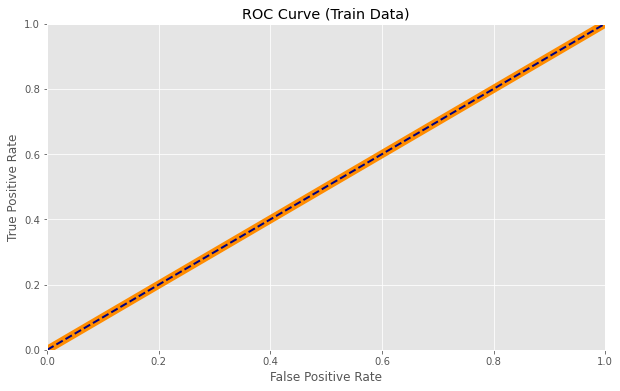

In [34]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_test, tpr_test)
plt.show()

## Area Under the ROC Curve (Test Data)

In [35]:
# Area under ROC curve
roc_auc_score(y_test,y_scores_test)

0.5

## Confusion Matrix

In [36]:
pd.crosstab(y_test, y_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,All
True,,
0,274,274
1,291,291
All,565,565


## Summary of Classification Metrics and the Test Data

In [37]:
#The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

precision = precision_score(y_test, y_test_predicted) 
print("Test Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1)
print(classification_report(y_test,y_test_predicted))


Test Accuracy:  0.5150442477876106

No. of correct predictions (Test): 291/565

Confusion Matrix (Test Data):
 [[  0 274]
 [  0 291]]
Test Precision = 0.515044
Test Recall = 1.000000
Test F1 Score = 0.679907
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       274
           1       0.52      1.00      0.68       291

    accuracy                           0.52       565
   macro avg       0.26      0.50      0.34       565
weighted avg       0.27      0.52      0.35       565

